<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [3]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [5]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [6]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [7]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [16]:
from sklearn.preprocessing import Binarizer
pred_proba = model_lor.predict_proba(X)
pred = model_lor.predict(X)
custom_threshold = 0.1
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
y_pred2 = binarizer.transform(pred_proba_1)


In [18]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
confusion = confusion_matrix(y, y_pred2)
accuracy = accuracy_score(y, y_pred2)
precision = precision_score(y, y_pred2)
recall = recall_score(y, y_pred2)
f1 = f1_score(y, y_pred2)

In [20]:
print("혼동행렬: {}, 정확도: {}, 정밀도: {}, 재현율{}, f1{}".format(confusion,accuracy,precision,recall,f1))

혼동행렬: [[267  90]
 [  6 206]], 정확도: 0.8312829525483304, 정밀도: 0.6959459459459459, 재현율0.9716981132075472, f10.8110236220472441


* ROC 곡선 시각화

In [23]:
from sklearn.metrics import roc_curve 
pred_proba_class1 = model_lor.predict_proba(X)[:,1]
fprs, tprs, thresholds = roc_curve(y, pred_proba_class1)

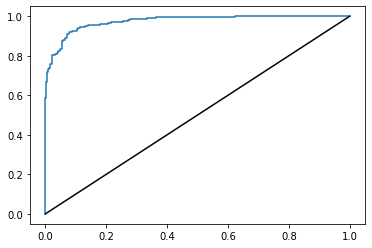

In [25]:
import matplotlib.pyplot as plt 
plt.plot(fprs, tprs, label='ROC')
plt.plot([0, 1], [0, 1], 'k-', label='Random')

* ROC AUC 값

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y, pred_proba[:,1])
print("AUC: {:.4f}".format(roc_auc))

AUC: 0.9742
